**GETTING AND UNDERSTANDING YOUR DATASETS**

In [1]:
!pip install -q datasets # installing huggings face dataset

In [26]:
from datasets import load_dataset # to read and load cdatasets
emotions = load_dataset("cardiffnlp/tweet_sentiment_multilingual", 'all') ## assigning emotion dataset to emotions variable

Generating train split:   0%|          | 0/14712 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2592 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6960 [00:00<?, ? examples/s]

In [27]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 14712
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2592
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 6960
    })
})

In [28]:
train_set = emotions['train'] ## setting the train dataset in the dict to train_set
train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 14712
})

In [39]:
train_set[3]

{'text': 'RT @user: المتعه افضل من الزواج لهتك اعراض عامة #الشيعهعبث باسم الاسلام  http',
 'label': 0}

REMOVING UNWANTED STRINGS FROM OUR DATA

In [44]:
import re

# Define a function to clean the text
def clean_text(text):
    text = re.sub('RT', '', text)  # Remove 'RT'
    text = re.sub('@user', '', text)  # Remove '@user'
    text = re.sub(':', '', text)  # Remove ':'
    text = re.sub('http', '', text)  # Remove 'http'
    text = text.strip()  # Remove leading and trailing white spaces
    return text

# Apply the function to the 'text' column of each dataset
emotions['train'] = emotions['train'].map(lambda examples: {'text': clean_text(examples['text'])})
emotions['test'] = emotions['test'].map(lambda examples: {'text': clean_text(examples['text'])})
emotions['validation'] = emotions['validation'].map(lambda examples: {'text': clean_text(examples['text'])})


Map:   0%|          | 0/14712 [00:00<?, ? examples/s]

Map:   0%|          | 0/6960 [00:00<?, ? examples/s]

Map:   0%|          | 0/2592 [00:00<?, ? examples/s]

In [45]:
train_set = emotions['train'] ## setting the train dataset in the dict to train_set
train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 14712
})

In [48]:
train_set[1840]

{'text': 'the DC comics site has Batman 44 releases on the 9th but its out now?',
 'label': 1}

text: a string feature containing the tweet.

label: an int classification label with the following mapping:

0: negative

1: neutral

2: positive

In [49]:
##converting dataset to dataframe
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,وصلنا لاقتصاد اسوء من سوريا والعراق ومن غير حر...,0
1,كاني ويست، دريك، نيكي، بيونسيه، قاقا,1
2,على فكره شركة محترمه حداعطوني كيبل كهديه ويوم...,2
3,المتعه افضل من الزواج لهتك اعراض عامة #الشيعهع...,0
4,القوات البرية السعودية والقوات الفرنسية الخاصة...,1


In [50]:
##getting the label of classification
def label_converter(row):
  return emotions['train'].features['label'].int2str(row)
df['label_name'] = df['label'].apply(label_converter)
df.head()

,text,label,label_name
0,وصلنا لاقتصاد اسوء من سوريا والعراق ومن غير حر...,0,negative
1,كاني ويست، دريك، نيكي، بيونسيه، قاقا,1,neutral
2,على فكره شركة محترمه حداعطوني كيبل كهديه ويوم...,2,positive
3,المتعه افضل من الزواج لهتك اعراض عامة #الشيعهع...,0,negative
4,القوات البرية السعودية والقوات الفرنسية الخاصة...,1,neutral


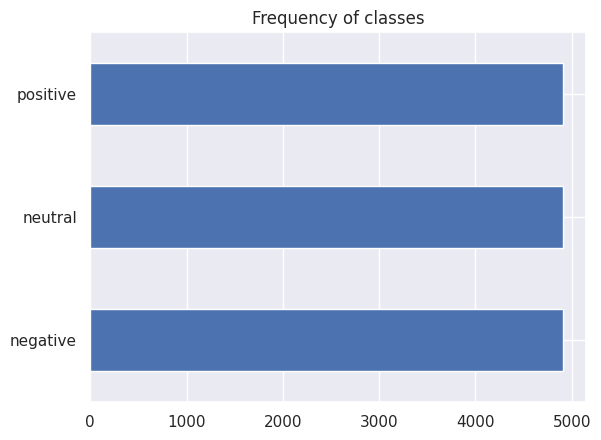

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title('Frequency of classes')
plt.show()



In [52]:
emotions.reset_format() ## to balance datasets

**DATA PREPROCESSING,(TOKENIZATION)**

In [54]:
!pip install -q transformers -U

In [55]:
## Using xlm-roberta-base model for tokenization
from transformers import AutoTokenizer

checkpoint = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)



def tokenize_function(batch):  # applying tokenizer to a batch of data
  return tokenizer(batch["text"], padding =True, truncation =True) #padding will pad the data with zeros to the size of the longest one in a batch
  # truncation will truncate the examples to the models max content size


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [56]:
print(tokenize_function(emotions['train'][:2]))

{'input_ids': [[0, 67136, 1069, 795, 149375, 754, 64023, 230, 53587, 31824, 25342, 9101, 6420, 91299, 785, 48338, 4102, 7938, 11924, 716, 48338, 4139, 665, 88727, 755, 4139, 13396, 15645, 906, 2418, 27, 2], [0, 4003, 179, 65, 79582, 50, 175, 19931, 50, 1706, 70328, 50, 4141, 900, 15162, 176, 50, 29281, 7024, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [61]:
tokenized_datasets = emotions.map(tokenize_function,
                                  batched = True,
                                  batch_size = None)

In [62]:
print(tokenized_datasets['train'].column_names) ##input_ids represent numeric representation of tokens,
#attentionmask used in model to ignore padded areas of dataset

['text', 'label', 'input_ids', 'attention_mask']


**MODELLING(DistillBert)**

In [63]:
## Using a pretrained model, xlm-roberta-base

from transformers import AutoModelForSequenceClassification
import torch


checkpoint = "xlm-roberta-base"
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

model = (AutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                            num_labels = 6).to(device))



model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1. Performance Metrics(Loss Function):Creating the compute_metrics object

In [64]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [65]:
## logging in the huggings face hub to get API key
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
! pip install -U accelerate


In [ ]:
! pip install -U transformers

In [66]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.38.2', '0.28.0')

In [ ]:
### TO RESTART KERNEL
#import os
#os._exit(00)

2. SPECIFYING PARAMETERS FOR TRAINING THE MODEL: Creating Trainer Arguments/Parameters Objects

In [69]:
## specifying parameters for training model
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="Finetuning-SENTIMENT-Model",
    num_train_epochs = 2,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy = "epoch",
    load_best_model_at_end = True,
    push_to_hub = True,
    report_to = "none"
)

3. CREATING THE TRAINER OBJECT FOR TRAINING

In [70]:
from transformers import Trainer


trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = tokenized_datasets['train'],
    eval_dataset = tokenized_datasets['validation'],
    tokenizer = tokenizer
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


4. TRAINING OR FINETUNING AN ALREADY PRETRAINED MODEL FOR SENTIMENT ANALYSIS

In [ ]:
trainer.train()

In [23]:
## saving model to hugging face hub
trainer.push_to_hub(commit_message = "Training completed")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/sirjosephenry/finetuning-emotion-model/commit/2869ffca5603e649526cf04896841133ccba8b89', commit_message='Training completed', commit_description='', oid='2869ffca5603e649526cf04896841133ccba8b89', pr_url=None, pr_revision=None, pr_num=None)

**PUSHING MODEL TO PIPELINE(API) FOR CLASSIFICATION**

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification",
                      model= "sirjosephenry/Finetuning-SENTIMENT-Model"
                      )

**CLASSIFYING TEXT BASED ON SENTIMENTS**

In [ ]:
pred = classifier(["i love joseph"],
                  return_all_scores = True)

**PLOT PROBABILITY OF EACH CLASS ON A BAR PLOT**

> Indented block



In [1]:
import pandas as pd

labels = emotions["train"].features["label"].names
df = pd.DataFrame(pred[0])
plt.bar(labels, 100*df["score"])
plt.show()

NameError: name 'emotions' is not defined

**ALREADY FINETUNED MODEL BY CARDIFF**

In [ ]:
##pip install tweetnlp


In [ ]:
# import tweetnlp
# model = tweetnlp.Classifier("cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual", max_length=128)
# model.predict('Get the all-analog Classic Vinyl Edition of "Takin Off" Album from {@herbiehancock@} via {@bluenoterecords@} link below {{URL}}')
